In [1]:
#Data Analysis on Iris Dataset

In [2]:
from sklearn.datasets import load_iris
import pandas as pd

In [3]:
#Here I have intalled openpyxl to run the excel file
!pip install openpyxl

In [4]:
#run excel file with the help of panda
flowerDataset = pd.read_excel("MLF_project1_IrishFlower.xlsx", engine="openpyxl")
flowerDataset.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [5]:
flowerDataset.shape
#is to check number os rows and columns

(150, 5)

In [6]:
flowerDataset.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
flowerDataset.isnull().sum()
#here we do not have any empty value in any column

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

In [8]:
Remove_sameData = flowerDataset.drop_duplicates(subset = "variety")
Remove_sameData
#Remove Duplicates if any or to check only unique data

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
50,7.0,3.2,4.7,1.4,Versicolor
100,6.3,3.3,6.0,2.5,Virginica


In [9]:
#now we want to count all elements of target value which is variety
flowerDataset.value_counts("variety")

variety
Setosa        50
Versicolor    50
Virginica     50
dtype: int64

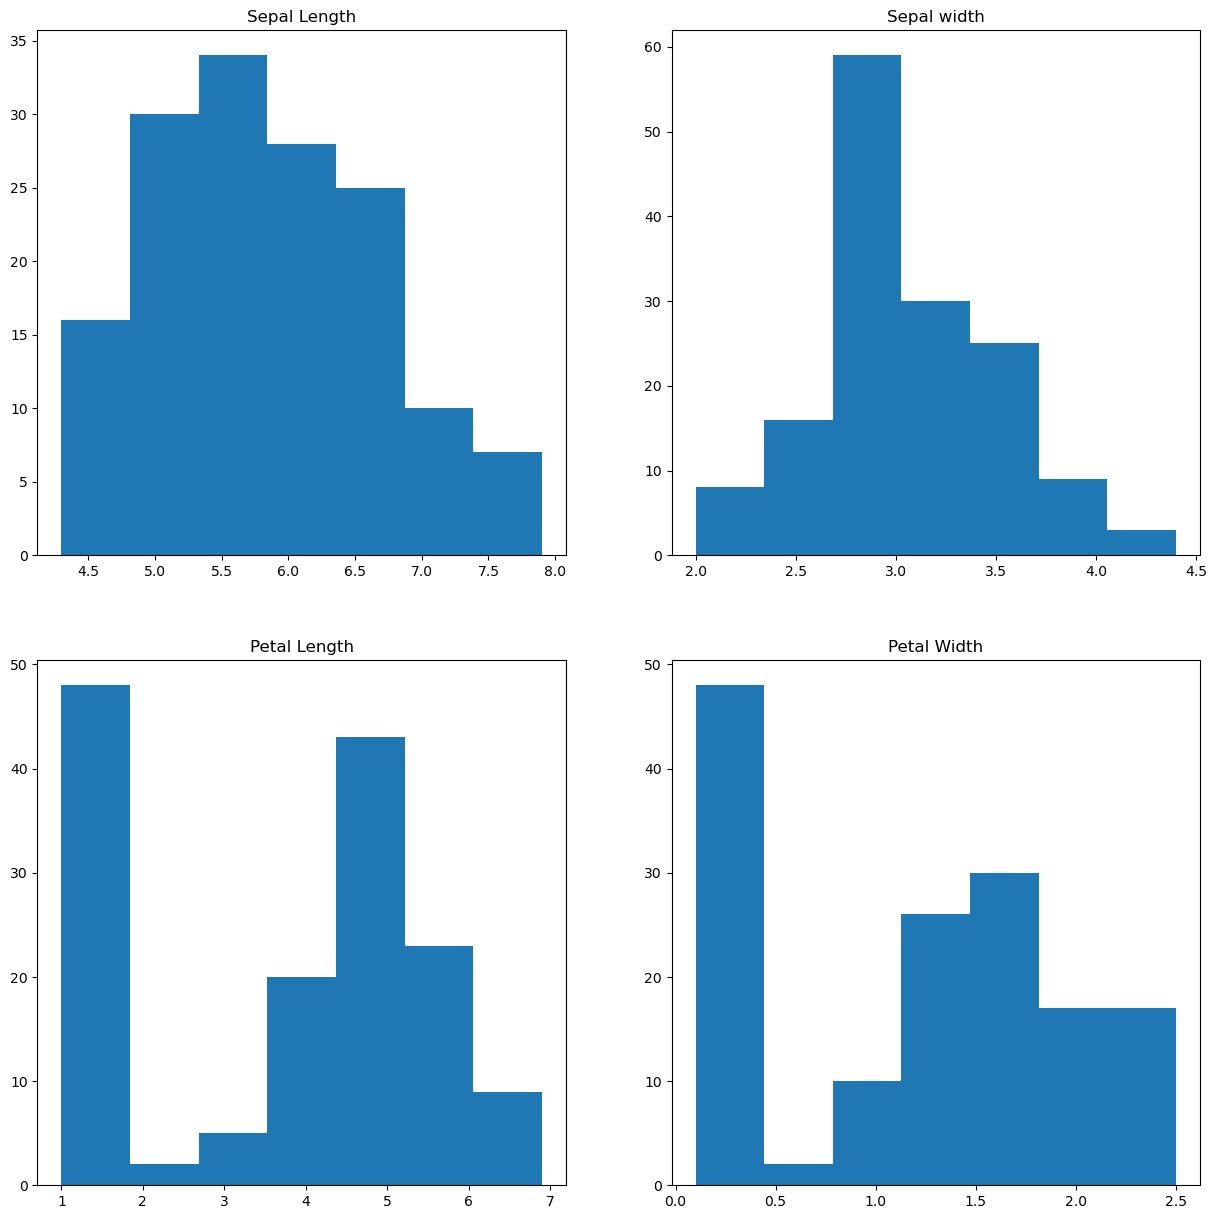

In [10]:
#Histogram representation of dataset
import seaborn as sns
import matplotlib.pyplot as plt

Fig, axes = plt.subplots(2,2,figsize=(15,15))

axes[0,0].set_title("Sepal Length")
axes[0,0].hist(flowerDataset["sepal.length"],bins=7)

axes[0,1].set_title("Sepal width")
axes[0,1].hist(flowerDataset["sepal.width"],bins=7)

axes[1,0].set_title("Petal Length")
axes[1,0].hist(flowerDataset["petal.length"],bins=7)

axes[1,1].set_title("Petal Width")
axes[1,1].hist(flowerDataset["petal.width"],bins=7)

plt.show()

In [11]:
#Here I want to convert target variable in numeric type
Total_variety={"Setosa":0,"Versicolor":1,"Virginica":2}
flowerDataset["variety"]=flowerDataset["variety"].map(Total_variety)
flowerDataset.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [12]:
#here I will use two different ratios of training, validation and test data ie 60-20-20,
#80-10-10. On the two different split ratios do the following
# First Validation and test data ie 60-20-20,

from sklearn.model_selection import train_test_split

Features=flowerDataset.drop("variety",axis=1)
Labels=flowerDataset["variety"]

X_train, X_test, y_train, y_test = train_test_split(Features,Labels,test_size=0.4,random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test,y_test,test_size=0.5,random_state=42)


In [13]:
for info in [y_train,y_test,y_val]:
    print(round(len(info)/len(Labels),2))

0.6
0.2
0.2


In [14]:
X_train.to_csv("TrainFt.csv",index=False)
X_val.to_csv("ValueFt.csv",index=False)
X_test.to_csv("TestFt.csv",index=False)

y_train.to_csv("TrainLb.csv",index=False)
y_val.to_csv("ValueLb.csv",index=False)
y_test.to_csv("TestLb.csv",index=False)

In [15]:
# Now we will apply the K-fold cross Validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

Train_Feature = pd.read_csv("TrainFt.csv")
Train_Labels = pd.read_csv("TrainLb.csv",header=None)
Train_Labels= Train_Labels[1:]
print(len(Train_Feature))
print(len(Train_Labels))
RandomForcast = RandomForestClassifier()

90
90


In [16]:

result= cross_val_score(RandomForcast, Train_Feature, Train_Labels.values.ravel(),cv=5)
result

array([1.        , 0.72222222, 1.        , 1.        , 0.94444444])

In [17]:
#we will apply function to print output
def showStatus(score):
    print("Best Params: {}\n".format(score.best_params_))
    Total_Mean=score.cv_results_["mean_test_score"]
    Total_stds=score.cv_results_["std_test_score"]
    for mean, std, parms in zip(Total_Mean, Total_stds, score.cv_results_["params"]):
        print('{} (+/-{}) for {}'.format(round(mean,3), round(std*2,3),parms))

In [18]:
#we will apply Random Forest Method
from sklearn.model_selection import GridSearchCV
criterion={
    'n_estimators':[5,50,100],
    'max_depth':[2,10,20,None]
}
 
cv = GridSearchCV(RandomForcast,criterion,cv=5)
cv.fit(Train_Feature,Train_Labels.values.ravel())
showStatus(cv)

Best Params: {'max_depth': 20, 'n_estimators': 5}

0.878 (+/-0.237) for {'max_depth': 2, 'n_estimators': 5}
0.933 (+/-0.215) for {'max_depth': 2, 'n_estimators': 50}
0.922 (+/-0.206) for {'max_depth': 2, 'n_estimators': 100}
0.933 (+/-0.163) for {'max_depth': 10, 'n_estimators': 5}
0.911 (+/-0.194) for {'max_depth': 10, 'n_estimators': 50}
0.911 (+/-0.194) for {'max_depth': 10, 'n_estimators': 100}
0.956 (+/-0.13) for {'max_depth': 20, 'n_estimators': 5}
0.911 (+/-0.194) for {'max_depth': 20, 'n_estimators': 50}
0.922 (+/-0.206) for {'max_depth': 20, 'n_estimators': 100}
0.878 (+/-0.163) for {'max_depth': None, 'n_estimators': 5}
0.922 (+/-0.206) for {'max_depth': None, 'n_estimators': 50}
0.911 (+/-0.194) for {'max_depth': None, 'n_estimators': 100}


In [19]:
randomForcast_classifier1 = RandomForestClassifier(n_estimators=50,max_depth=2)
randomForcast_classifier1.fit(Train_Feature,Train_Labels.values.ravel())

randomForcast_classifier2 = RandomForestClassifier(n_estimators=50,max_depth=10)
randomForcast_classifier2.fit(Train_Feature,Train_Labels.values.ravel())

randomForcast_classifier3 = RandomForestClassifier(n_estimators=100,max_depth=None)
randomForcast_classifier3.fit(Train_Feature,Train_Labels.values.ravel())



RandomForestClassifier()

In [20]:
#Now We will Evaluate models into validation

from sklearn.metrics import accuracy_score,precision_score,recall_score
ValueFt = pd.read_csv("ValueFt.csv")
ValueLb = pd.read_csv("ValueLb.csv",header = None)
ValueLb = ValueLb[1:]

for i in [randomForcast_classifier1,randomForcast_classifier2,randomForcast_classifier3]:
    y_pred = i.predict(ValueFt)
    
    Count = round(accuracy_score(ValueLb,y_pred),3)
    Prc = round(precision_score(ValueLb,y_pred,average='micro'),3)
    recall = round(recall_score(ValueLb,y_pred,average='micro'),3)
    
    print("Max Depth:{}/ #OF EST:{}--A: {}/ p:{}/ R:{}".format(i.max_depth,i.n_estimators,Count,Prc,recall))
    

Max Depth:2/ #OF EST:50--A: 0.967/ p:0.967/ R:0.967
Max Depth:10/ #OF EST:50--A: 0.967/ p:0.967/ R:0.967
Max Depth:None/ #OF EST:100--A: 0.967/ p:0.967/ R:0.967


In [21]:
testFeature = pd.read_csv("TestFt.csv")
testLabels  = pd.read_csv("TestLb.csv",header=None)
testLabels  = testLabels[1:]
y_pred = randomForcast_classifier1.predict(testFeature)

Count = round(accuracy_score(testLabels,y_pred),3)
Prc = round(precision_score(testLabels,y_pred,average='micro'),3)
recall = round(recall_score(testLabels,y_pred,average='micro'),3)
    
print("Max Depth:{}/ #OF EST:{}--A: {}/ p:{}/ R:{}".format(i.max_depth,i.n_estimators,Count,Prc,recall))

Max Depth:None/ #OF EST:100--A: 1.0/ p:1.0/ R:1.0


In [22]:
#Apply  Grid search to  find optimal hyparameters with SVM,Boosting,Random forest.

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

criterion = {
    'n_estimators':[5,50,100],
    'max_depth':[2,10,20,None]
}

cv = GridSearchCV(GradientBoostingClassifier(),criterion,cv=5)
cv.fit(Train_Feature,Train_Labels.values.ravel())
showStatus(cv)

Best Params: {'max_depth': 10, 'n_estimators': 5}

0.9 (+/-0.191) for {'max_depth': 2, 'n_estimators': 5}
0.911 (+/-0.206) for {'max_depth': 2, 'n_estimators': 50}
0.9 (+/-0.191) for {'max_depth': 2, 'n_estimators': 100}
0.922 (+/-0.206) for {'max_depth': 10, 'n_estimators': 5}
0.922 (+/-0.206) for {'max_depth': 10, 'n_estimators': 50}
0.922 (+/-0.206) for {'max_depth': 10, 'n_estimators': 100}
0.911 (+/-0.194) for {'max_depth': 20, 'n_estimators': 5}
0.922 (+/-0.206) for {'max_depth': 20, 'n_estimators': 50}
0.922 (+/-0.206) for {'max_depth': 20, 'n_estimators': 100}
0.922 (+/-0.206) for {'max_depth': None, 'n_estimators': 5}
0.922 (+/-0.206) for {'max_depth': None, 'n_estimators': 50}
0.922 (+/-0.206) for {'max_depth': None, 'n_estimators': 100}


In [23]:
GradientBoostingClassifier1 =GradientBoostingClassifier(n_estimators=5,max_depth=10)
GradientBoostingClassifier1.fit(Train_Feature,Train_Labels.values.ravel())

GradientBoostingClassifier2 =GradientBoostingClassifier(n_estimators=5,max_depth=20)
GradientBoostingClassifier2.fit(Train_Feature,Train_Labels.values.ravel())

GradientBoostingClassifier3 =GradientBoostingClassifier(n_estimators=5,max_depth=None)
GradientBoostingClassifier3.fit(Train_Feature,Train_Labels.values.ravel())


GradientBoostingClassifier(max_depth=None, n_estimators=5)

In [24]:
from sklearn.metrics import accuracy_score,precision_score,recall_score

ValueFt = pd.read_csv("ValueFt.csv")
ValueLb = pd.read_csv("ValueLb.csv",header=None)
ValueLb = ValueLb[1:]

for n in [GradientBoostingClassifier1,GradientBoostingClassifier2,GradientBoostingClassifier3]:
    y_pred = n.predict(ValueFt)
    Count = round(accuracy_score(ValueLb,y_pred),3)
    Prc = round(precision_score(ValueLb,y_pred,average='micro'),3)
    recall = round(recall_score(ValueLb,y_pred,average='micro'),3)
    
    print("Max Depth:{}/ #OF EST:{}--A: {}/ p:{}/ R:{}".format(n.max_depth,n.n_estimators,Count,Prc,recall))

Max Depth:10/ #OF EST:5--A: 1.0/ p:1.0/ R:1.0
Max Depth:20/ #OF EST:5--A: 1.0/ p:1.0/ R:1.0
Max Depth:None/ #OF EST:5--A: 1.0/ p:1.0/ R:1.0


In [25]:
#check best model for test set

TestFt = pd.read_csv("TestFt.csv")
TestLb = pd.read_csv("TestLb.csv", header = None)
TestLb = TestLb[1:]
y_pred = GradientBoostingClassifier3.predict(TestFt)

Count=round(accuracy_score(TestLb,y_pred),3)
Prc=round(precision_score(TestLb,y_pred,average='micro'),3)
recall = round(recall_score(TestLb,y_pred,average='micro'),3)
print("Max Depth:{}/ #OF EST:{}--A: {}/ p:{}/ R:{}".format(n.max_depth,n.n_estimators,Count,Prc,recall))

Max Depth:None/ #OF EST:5--A: 1.0/ p:1.0/ R:1.0


In [26]:
#Apply SVM model

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
mdl = SVC()

pvm = {'kernel': ('linear', 'rbf'), 'C': [1, 10]}
cv = GridSearchCV(mdl,pvm,cv=5)
cv.fit(Train_Feature,Train_Labels.values.ravel())
showStatus(cv)

Best Params: {'C': 1, 'kernel': 'linear'}

0.956 (+/-0.083) for {'C': 1, 'kernel': 'linear'}
0.922 (+/-0.113) for {'C': 1, 'kernel': 'rbf'}
0.933 (+/-0.109) for {'C': 10, 'kernel': 'linear'}
0.944 (+/-0.07) for {'C': 10, 'kernel': 'rbf'}


In [27]:
SVM_model1 = SVC(C=1.0,kernel="linear")
SVM_model1.fit(Train_Feature,Train_Labels.values.ravel())

SVM_model2 = SVC(C=10.0,kernel="linear")
SVM_model2.fit(Train_Feature,Train_Labels.values.ravel())

SVM_model3 = SVC(C=10.0,kernel="linear")
SVM_model3.fit(Train_Feature,Train_Labels.values.ravel())

SVC(C=10.0, kernel='linear')

In [28]:
from sklearn.metrics import accuracy_score,precision_score,recall_score


ValueFt = pd.read_csv("ValueFt.csv")
ValueLb = pd.read_csv("ValueLb.csv",header = None)
ValueLb = ValueLb[1:]

for j in [SVM_model1,SVM_model2,SVM_model3]:
    y_pred=j.predict(ValueFt)
#     print(len(y_pred))
    Count=round(accuracy_score(ValueLb,y_pred),3)
    Prc=round(precision_score(ValueLb,y_pred,average='micro'),3)
    recall = round(recall_score(ValueLb,y_pred,average='micro'),3)
    print("C:{}/ #OF kernel:{}--A: {}/ p:{}/ R:{}".format(j.C,j.kernel,Count,Prc,recall))

C:1.0/ #OF kernel:linear--A: 1.0/ p:1.0/ R:1.0
C:10.0/ #OF kernel:linear--A: 1.0/ p:1.0/ R:1.0
C:10.0/ #OF kernel:linear--A: 1.0/ p:1.0/ R:1.0


In [29]:
TestFt = pd.read_csv("TestFt.csv")
TestLb  = pd.read_csv("TestLb.csv",header=None)
TestLb  = TestLb[1:]
y_pred = SVM_model1.predict(TestFt)


Count=round(accuracy_score(TestLb,y_pred),3)
Prc=round(precision_score(TestLb,y_pred,average='micro'),3)
recall = round(recall_score(TestLb,y_pred,average='micro'),3)
print("C:{}/ #OF kernel:{}--A: {}/ p:{}/ R:{}".format(j.C,j.kernel,Count,Prc,recall))

C:10.0/ #OF kernel:linear--A: 1.0/ p:1.0/ R:1.0


In [30]:
#Now we will split data into 80-20-20

from sklearn.model_selection import train_test_split

features=flowerDataset.drop("variety",axis=1)
labels=flowerDataset["variety"]


X_train, X_test, y_train, y_test = train_test_split(features,labels,test_size=0.2,random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test,y_test,test_size=0.5,random_state=42)

In [31]:
for data in [y_train,y_test,y_val]:
    print(round(len(data)/len(labels),2))

0.8
0.1
0.1


In [32]:
X_train.to_csv("trainFeatures.csv",index=False)
X_val.to_csv("valueFeatures.csv",index=False)
X_test.to_csv("testFeatures.csv",index=False)

y_train.to_csv("trainLabels.csv",index=False)
y_val.to_csv("valueLabels.csv",index=False)
y_test.to_csv("testLabels.csv",index=False)

In [33]:
#Apply K fold cross validation

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

trainFeature = pd.read_csv("trainFeatures.csv")
trainLabels = pd.read_csv("trainLabels.csv",header= None)
trainLabels = trainLabels[1:]

print(len(trainFeature))
print(len(trainLabels))
rf = RandomForestClassifier()

120
120


In [34]:
result = cross_val_score(rf, trainFeature, trainLabels.values.ravel(),cv=5)
result

array([0.95833333, 1.        , 0.83333333, 0.95833333, 0.95833333])

In [35]:
#Apply Rendom Forest

from sklearn.model_selection import GridSearchCV
parameters={
    'n_estimators':[5,50,100],
    'max_depth':[2,10,20,None]
}
cv = GridSearchCV(rf,parameters,cv=5)
cv.fit(trainFeature,trainLabels.values.ravel())
showStatus(cv)

Best Params: {'max_depth': 10, 'n_estimators': 5}

0.942 (+/-0.125) for {'max_depth': 2, 'n_estimators': 5}
0.933 (+/-0.145) for {'max_depth': 2, 'n_estimators': 50}
0.933 (+/-0.145) for {'max_depth': 2, 'n_estimators': 100}
0.95 (+/-0.122) for {'max_depth': 10, 'n_estimators': 5}
0.942 (+/-0.113) for {'max_depth': 10, 'n_estimators': 50}
0.942 (+/-0.113) for {'max_depth': 10, 'n_estimators': 100}
0.933 (+/-0.145) for {'max_depth': 20, 'n_estimators': 5}
0.942 (+/-0.155) for {'max_depth': 20, 'n_estimators': 50}
0.95 (+/-0.122) for {'max_depth': 20, 'n_estimators': 100}
0.917 (+/-0.129) for {'max_depth': None, 'n_estimators': 5}
0.942 (+/-0.113) for {'max_depth': None, 'n_estimators': 50}
0.95 (+/-0.122) for {'max_depth': None, 'n_estimators': 100}


In [36]:
RandomFC1 =RandomForestClassifier(n_estimators=50,max_depth=2)
RandomFC1.fit(trainFeature,trainLabels.values.ravel())

RandomFC2 =RandomForestClassifier(n_estimators=50,max_depth=10)
RandomFC2.fit(trainFeature,trainLabels.values.ravel())

RandomFC3 =RandomForestClassifier(n_estimators=100,max_depth=None)
RandomFC3.fit(trainFeature,trainLabels.values.ravel())

RandomForestClassifier()

In [37]:
from sklearn.metrics import accuracy_score,precision_score,recall_score

Value_Feature = pd.read_csv("valueFeatures.csv")
Value_Labels = pd.read_csv("valueLabels.csv",header=None)
Value_Labels = Value_Labels[1:]

for k in [RandomFC1,RandomFC2,RandomFC3]:
    y_pred=k.predict(Value_Feature)
#     print(len(y_pred))
    Count=round(accuracy_score(Value_Labels,y_pred),3)
    Prc=round(precision_score(Value_Labels,y_pred,average='micro'),3)
    recall = round(recall_score(Value_Labels,y_pred,average='micro'),3)
    print("Max Depth:{}/ #OF EST:{}--A: {}/ p:{}/ R:{}".format(k.max_depth,k.n_estimators,Count,Prc,recall))

Max Depth:2/ #OF EST:50--A: 1.0/ p:1.0/ R:1.0
Max Depth:10/ #OF EST:50--A: 1.0/ p:1.0/ R:1.0
Max Depth:None/ #OF EST:100--A: 1.0/ p:1.0/ R:1.0


In [38]:
Test_Feature = pd.read_csv("testFeatures.csv")
Test_Labels  = pd.read_csv("testLabels.csv",header=None)
Test_Labels  = Test_Labels[1:]
y_pred = RandomFC1.predict(Test_Feature)

Count=round(accuracy_score(Test_Labels,y_pred),3)
Prc=round(precision_score(Test_Labels,y_pred,average='micro'),3)
recall = round(recall_score(Test_Labels,y_pred,average='micro'),3)
print("Max Depth:{}/ #OF EST:{}--A: {}/ p:{}/ R:{}".format(k.max_depth,k.n_estimators,Count,Prc,recall))

Max Depth:None/ #OF EST:100--A: 1.0/ p:1.0/ R:1.0


In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
PMR={
    'n_estimators':[5,50,100],
    'max_depth':[2,10,20,None]
}
# parameters = {'kernel': ('linear', 'rbf'), 'C': [1, 10]}
cv = GridSearchCV(GradientBoostingClassifier(),PMR,cv=5)
cv.fit(trainFeature,trainLabels.values.ravel())
showStatus(cv)

Best Params: {'max_depth': 10, 'n_estimators': 5}

0.942 (+/-0.125) for {'max_depth': 2, 'n_estimators': 5}
0.942 (+/-0.113) for {'max_depth': 2, 'n_estimators': 50}
0.917 (+/-0.105) for {'max_depth': 2, 'n_estimators': 100}
0.95 (+/-0.122) for {'max_depth': 10, 'n_estimators': 5}
0.95 (+/-0.122) for {'max_depth': 10, 'n_estimators': 50}
0.95 (+/-0.122) for {'max_depth': 10, 'n_estimators': 100}
0.95 (+/-0.122) for {'max_depth': 20, 'n_estimators': 5}
0.95 (+/-0.122) for {'max_depth': 20, 'n_estimators': 50}
0.95 (+/-0.122) for {'max_depth': 20, 'n_estimators': 100}
0.95 (+/-0.122) for {'max_depth': None, 'n_estimators': 5}
0.95 (+/-0.122) for {'max_depth': None, 'n_estimators': 50}
0.95 (+/-0.122) for {'max_depth': None, 'n_estimators': 100}


In [40]:
GradientBC1 =GradientBoostingClassifier(n_estimators=5,max_depth=10)
GradientBC1.fit(trainFeature,trainLabels.values.ravel())

GradientBC2 =GradientBoostingClassifier(n_estimators=5,max_depth=20)
GradientBC2.fit(trainFeature,trainLabels.values.ravel())

GradientBC3 =GradientBoostingClassifier(n_estimators=5,max_depth=None)
GradientBC3.fit(trainFeature,trainLabels.values.ravel())

GradientBoostingClassifier(max_depth=None, n_estimators=5)

In [41]:
from sklearn.metrics import accuracy_score,precision_score,recall_score
Value_Feature = pd.read_csv("valueFeatures.csv")
Value_Labels = pd.read_csv("valueLabels.csv",header=None)
Value_Labels = Value_Labels[1:]
# print(len(val_feature))
# print(val_labels)
for h in [GradientBC1,GradientBC2,GradientBC3]:
    y_pred=h.predict(Value_Feature)
#     print(len(y_pred))
    Count=round(accuracy_score(Value_Labels,y_pred),3)
    Prc=round(precision_score(Value_Labels,y_pred,average='micro'),3)
    recall = round(recall_score(Value_Labels,y_pred,average='micro'),3)
    print("Max Depth:{}/ #OF EST:{}--A: {}/ p:{}/ R:{}".format(h.max_depth,h.n_estimators,Count,Prc,recall))

Max Depth:10/ #OF EST:5--A: 1.0/ p:1.0/ R:1.0
Max Depth:20/ #OF EST:5--A: 1.0/ p:1.0/ R:1.0
Max Depth:None/ #OF EST:5--A: 1.0/ p:1.0/ R:1.0


In [42]:
Test_Feature = pd.read_csv("testFeatures.csv")
Test_Labels  = pd.read_csv("testLabels.csv",header=None)
Test_Labels  = Test_Labels[1:]
y_pred = GradientBC3.predict(Test_Feature)

Count=round(accuracy_score(Test_Labels,y_pred),3)
Prc=round(precision_score(Test_Labels,y_pred,average='micro'),3)
recall = round(recall_score(Test_Labels,y_pred,average='micro'),3)
print("Max Depth:{}/ #OF EST:{}--A: {}/ p:{}/ R:{}".format(h.max_depth,h.n_estimators,Count,Prc,recall))

Max Depth:None/ #OF EST:5--A: 1.0/ p:1.0/ R:1.0


In [43]:
#Apply SVM Model

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
model=SVC()

parameters = {'kernel': ('linear', 'rbf'), 'C': [1, 10]}
cv = GridSearchCV(model,parameters,cv=5)
cv.fit(trainFeature,trainLabels.values.ravel())
showStatus(cv)

Best Params: {'C': 1, 'kernel': 'linear'}

0.958 (+/-0.091) for {'C': 1, 'kernel': 'linear'}
0.95 (+/-0.122) for {'C': 1, 'kernel': 'rbf'}
0.95 (+/-0.122) for {'C': 10, 'kernel': 'linear'}
0.95 (+/-0.122) for {'C': 10, 'kernel': 'rbf'}


In [44]:
svm_Model1 =SVC(C=1.0,kernel="linear")
svm_Model1.fit(trainFeature,trainLabels.values.ravel())

svm_Model2 =SVC(C=10.0,kernel="rbf")
svm_Model2.fit(trainFeature,trainLabels.values.ravel())

svm_Model3 =SVC(C=10.0,kernel="linear")
svm_Model3.fit(trainFeature,trainLabels.values.ravel())

SVC(C=10.0, kernel='linear')

In [45]:
from sklearn.metrics import accuracy_score,precision_score,recall_score
Value_Feature = pd.read_csv("valueFeatures.csv")
Value_Labels = pd.read_csv("valueLabels.csv",header=None)
Value_Labels = Value_Labels[1:]
# print(len(val_feature))
# print(val_labels)
for g in [svm_Model1,svm_Model2,svm_Model3]:
    y_pred=g.predict(Value_Feature)
#     print(len(y_pred))
    Count=round(accuracy_score(Value_Labels,y_pred),3)
    Prc=round(precision_score(Value_Labels,y_pred,average='micro'),3)
    recall = round(recall_score(Value_Labels,y_pred,average='micro'),3)
    print("C:{}/ #OF kernel:{}--A: {}/ p:{}/ R:{}".format(g.C,g.kernel,Count,Prc,recall))

C:1.0/ #OF kernel:linear--A: 1.0/ p:1.0/ R:1.0
C:10.0/ #OF kernel:rbf--A: 1.0/ p:1.0/ R:1.0
C:10.0/ #OF kernel:linear--A: 0.933/ p:0.933/ R:0.933


In [46]:
#Apply best modet to test set

Test_Feature = pd.read_csv("testFeatures.csv")
Test_Labels  = pd.read_csv("testLabels.csv",header=None)
Test_Labels  = Test_Labels[1:]
y_pred = svm_Model1.predict(Test_Feature)

Count=round(accuracy_score(Test_Labels,y_pred),3)
Prc=round(precision_score(Test_Labels,y_pred,average='micro'),3)
recall = round(recall_score(Test_Labels,y_pred,average='micro'),3)
print("C:{}/ #OF kernel:{}--A: {}/ p:{}/ R:{}".format(g.C,g.kernel,Count,Prc,recall))

C:10.0/ #OF kernel:linear--A: 1.0/ p:1.0/ R:1.0
